<a href="https://colab.research.google.com/github/albert-melo/ProgCiencia-de-Dados/blob/master/WorkProgCienciaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho da Disciplina Programação para Ciência de Dados

##Aluno:

> ###Albert Lima de Melo



#Montagem do Drive para acesso a base de dados
Criação do drive para acessar os dados a serem analisados e tratados.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importação da base de dados **_dados-curso-completo.csv_** 
Utilizando a biblioteca do Pandas para leitura do arquivo de dados que estão tabulados no padrão CSV.

In [3]:
import pandas as pd
dados = pd.read_csv("/content/drive/My Drive/WorkProgCD/dados-curso-completo.csv")


#Requisitos

##1. Devem apresentar um resumo (sumário) com as estatísticas dos dados originais, ou seja, sem qualquer pré-processamento. A apresentação deste tipo de informação é relevante para que outras pessoas possam ter uma visão geral dos dados. As estatísticas podem ser apresentadas através de tabelas e/ou gráficos.

#1. Visão Geral dos Dados

A seguir vamos explorar os dados da base disponibilizada

##1.2. Shape
Formato da base de dados

In [11]:
dados.shape

(1658825, 13)

##1.3 Amostra dos dados
Pequena amostra dos dados


In [10]:
dados.head(10)


,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]
5,2020-05-08 11:21:36,Marcel Silvano,marcelsilvano,"Importantes avanços! A pesquisa brasileira, a ...",4,2769,pt,Macaé,Brazil,BR,NaN,NaN,[]
6,2020-03-10 21:27:40,Teixeira Correia,LidadorNoticias,(Última hora) Volta ao Alentejo: Anulada por c...,0,39,pt,NaN,NaN,NaN,NaN,NaN,[]
7,2020-06-04 13:22:21,Thiago Moraes,ThiagoMoraesPB,João Pessoa tem queda no isolamento social por...,1,3578,pt,NaN,NaN,NaN,NaN,NaN,[]
8,2020-05-07 21:32:12,PT Brasil,ptbrasil,A #tvPT de hoje vai falar sobre a pandemia na ...,10,942696,pt,NaN,NaN,NaN,NaN,NaN,['tvPT']
9,2020-03-11 20:27:49,Niquito ;),NLazaroto,O Coronavirús causou uma pandemia e eu ainda n...,0,215,pt,NaN,NaN,NaN,NaN,NaN,[]


##1.3. Informações sobre os dados


In [5]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658825 entries, 0 to 1658824
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   data        1658825 non-null  object 
 1   usuario     1658768 non-null  object 
 2   apelido     1658825 non-null  object 
 3   texto       1658825 non-null  object 
 4   retweet     1658825 non-null  int64  
 5   seguidores  1658825 non-null  int64  
 6   idioma      1658825 non-null  object 
 7   lugar       74605 non-null    object 
 8   pais        74600 non-null    object 
 9   sigla       74595 non-null    object 
 10  latitude    8720 non-null     float64
 11  longitude   8720 non-null     float64
 12  hashtags    1658825 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 164.5+ MB


##1.4. Descrição dos dados

In [42]:
descricao = dados.describe().round(2)
descricao = descricao.transpose()
descricao

,count,mean,std,min,25%,50%,75%,max
retweet,1658825.0,197.85,6337.64,0.00,0.00,0.00,0.00,1139763.00
seguidores,1658825.0,32572.06,368029.99,0.00,101.00,380.00,1470.00,84241250.00
latitude,8720.0,-40.24,20.81,-123.12,-47.86,-43.96,-38.45,174.79
longitude,8720.0,-11.12,19.17,-37.82,-23.31,-19.62,-7.12,58.26


##1.5. Postagens por países
Gráfico que demonstra o volume de postagens dos Tweets por país informado

In [43]:
dados2 = dados
paises = dados2["pais"].drop_duplicates()
paises = list(paises)
dados2 = dados2[dados2['pais'].isin(paises)]
dados2.drop_duplicates()
grp_pais = dados2.groupby('pais')

In [44]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Postagens por país')

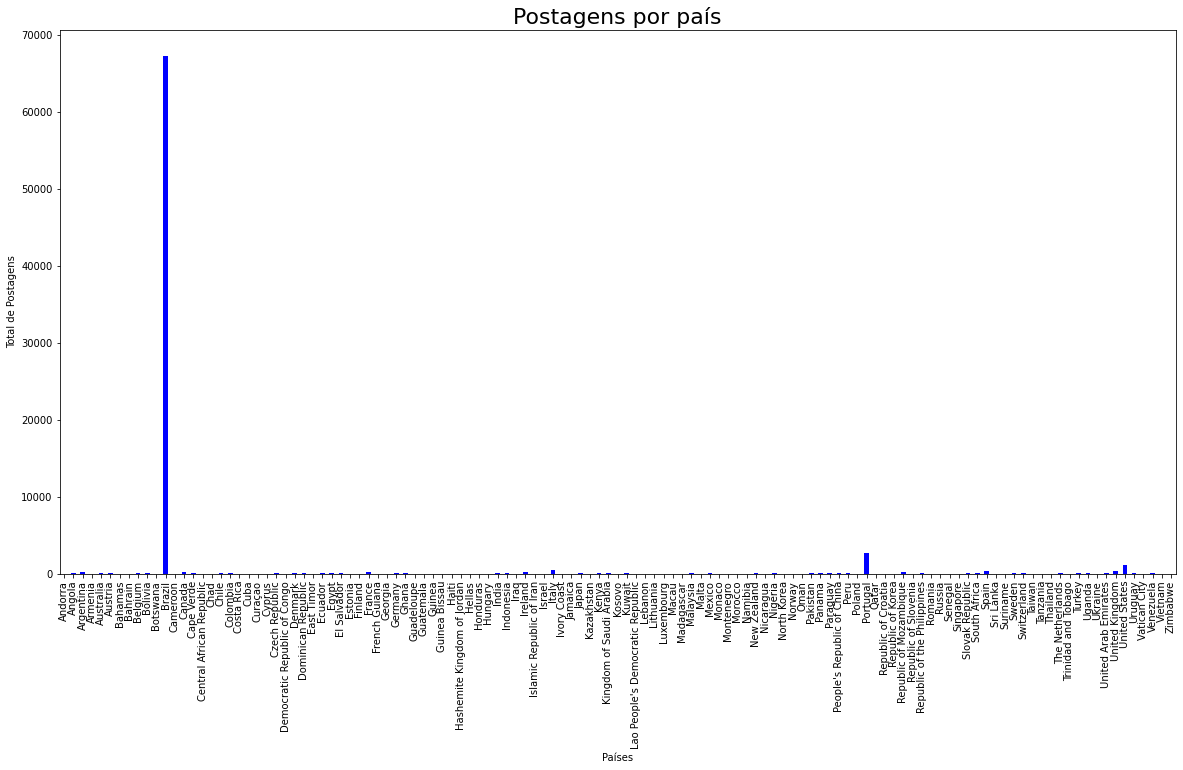

In [45]:
grp_pais[ ['pais'] ].count()

fig = grp_pais['pais'].count().plot.bar(color="blue")
fig.set_ylabel("Total de Postagens")
fig.set_xlabel("Países")
fig.set_title("Postagens por país", {'fontsize': 22})


###1.6. Quantidade de países e comentários com geolocalização

A seguir segue a quantidade de países identificados a partir das postagens realizadas e a quantidade da postagens postagens que possuem geolocalização.

In [60]:
paises = dados["pais"].value_counts()
print("Quandidade de Países:", len(paises))
locais_geo = dados[ dados["longitude"].isnull() ==False ]
print("Comentários com geo localização:", len(locais_geo))


Quandidade de Países: 121
Comentários com geo localização: 8720


##1.7. Visualização das postagens pelo mundo
Postagens pelo mundo dos Tweets que possuem geolocalizacao

In [47]:
pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 14.8MB 310kB/s 
     |████████████████████████████████| 10.9MB 48.0MB/s 


In [50]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame 

In [61]:
diferencaRegistrosLocais = len(dados) - len(locais_geo)

print("Numero de registros sem geo localização: ", diferencaRegistrosLocais)

Numero de registros sem geo localização:  1650105


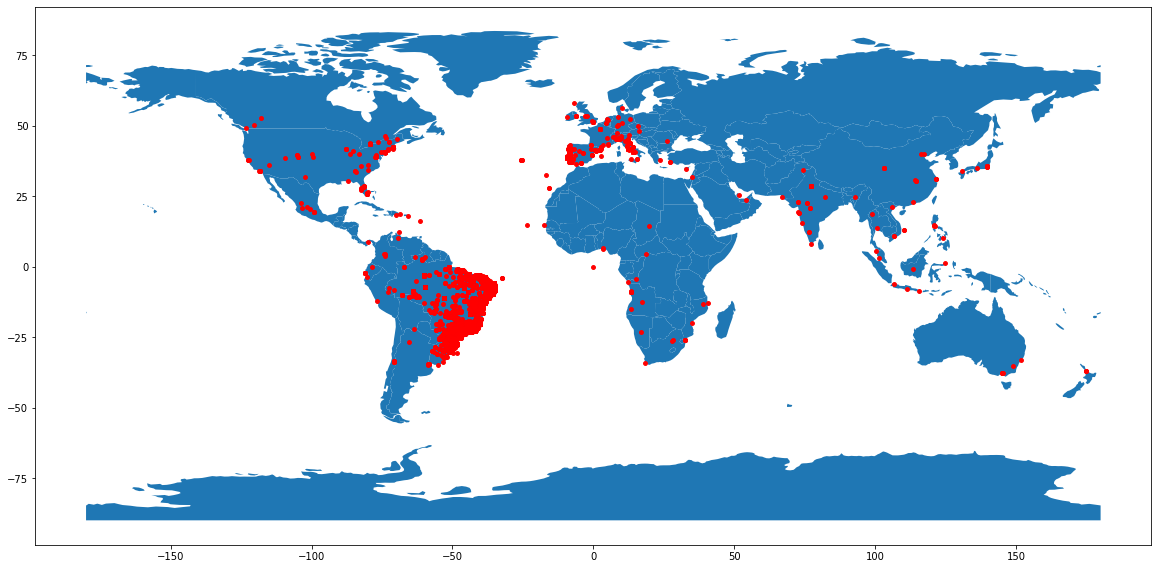

In [63]:
geometry  = [Point(xy) for xy in zip(locais_geo['latitude'], locais_geo['longitude'])]
gdf = GeoDataFrame(locais_geo, geometry = geometry,)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 12)), marker = 'o', color = 'red', markersize = 15)

##2.Gerar base DúvidasDB
As mensagens foram pré-processadas para que as perguntas (questões) fossem identificadas.
Essa coleção de perguntas corresponde ao dataset \DuvidasDB". A seguir, a equipe deve apresentar as estatísticas sobre esses dados.

In [194]:
#Funcao para separar sentenças a partir de um caracter/substring especificada
def separaTexto(texto="", substr=""):
  x = texto.find(substr)
  if x==-1: 
    return "",""
  else:
    return texto[:x+1] , texto[x+1:]
  

In [212]:
#Funcao gera uma lista de sentenças a partir de um caractere informado
def separaPerguntas(texto, caractere):
  perguntas = list()
  while len(texto)>0:
    pergunta, resto = separaTexto(texto, caractere)
    pergunta = pergunta.lstrip(" ")
    if len(pergunta)>1:
      perguntas.append(pergunta)
    if len(resto)==0: break
    texto = resto;
  return perguntas



In [287]:
pre_perguntas = dados[ dados["texto"].str.contains("?", regex=False) ]
print(len(pre_perguntas))


#Converte conteúdo de texto em minúsculo
registro = {'data':'', 'usuario':'', 'apelido':'', 'duvida':'', 'retweet':'', 'seguidores':'', 'idioma':'', 'lugar':'', 'pais':'', 'sigla': '', 'latitude':'' , 'longitude':'', 'hashtags':'' }
duvidas = list()


i_perguntas = list( pre_perguntas.index )
lista_perguntas = list()

i_perguntas[len(i_perguntas)-1]

pre_perguntas.tail(10)

pre_perguntas.head()


172501


indice,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
38,2020-06-25 11:09:19,Andreia Peraro,AndreiaPeraro,@ipratesMD @dr_pampers Será que corremos o ris...,0,86,pt,NaN,NaN,NaN,NaN,NaN,[]
45,2020-04-06 15:44:36,Diorgenes Pandini,diorpandini,Prioridade ?!\n\n #COVID19 #floripa #isolament...,0,219,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']"
57,2020-03-30 00:43:36,Valnei do Val,vdoval,"Que tal uma notícia boa, indo na contramão do ...",0,201,pt,NaN,NaN,NaN,NaN,NaN,[]


In [290]:
#Separa os textos que apresentam '?'
pre_perguntas = dados[ dados["texto"].str.contains("?", regex=False) ]

#Converte conteúdo de texto em minúsculo
#registro = {'data':'', 'usuario':'', 'apelido':'', 'duvida':'', 'retweet':'', 'seguidores':'', 'idioma':'', 'lugar':'', 'pais':'', 'sigla': '', 'latitude':'' , 'longitude':'', 'hashtags':'' }
registro = {'data':'', 'duvida':'', 'lugar':'', 'pais':'', 'sigla': '', 'latitude':'' , 'longitude':'', 'tema':"" }

duvidas = list()

pre_perguntas.columns.name = 'indice'
i_perguntas = list( pre_perguntas.index )
lista_perguntas = list()
for i in range(len(i_perguntas)):
  lista_perguntas = separaPerguntas( dados.texto[int(i_perguntas[i])], "?")
  for p in range(len(lista_perguntas)):
    #try:
      registro['data'] = pre_perguntas.iloc[i_perguntas[i]].data
      #registro['usuario'] = pre_perguntas.iloc[i_perguntas[i]].usuario
      #registro['apelido'] = pre_perguntas.iloc[i_perguntas[i]].apelido
      registro['duvida'] = lista_perguntas[p]
      #registro['retweet'] = pre_perguntas.iloc[i_perguntas[i]].retweet
      #registro['seguidores'] = pre_perguntas.iloc[i_perguntas[i]].seguidores
      #registro['idioma'] = pre_perguntas.iloc[i_perguntas[i]].idioma
      registro['lugar'] = pre_perguntas.iloc[i_perguntas[i]].lugar
      registro['pais'] = pre_perguntas.iloc[i_perguntas[i]].pais
      registro['sigla'] = pre_perguntas.iloc[i_perguntas[i]].sigla
      registro['latitude'] = pre_perguntas.iloc[i_perguntas[i]].latitude
      registro['longitude'] = pre_perguntas.iloc[i_perguntas[i]].longitude
      #registro['hashtags'] = pre_perguntas.iloc[i_perguntas[i]].hashtags
      registro['tema']='tema'
      duvidas.append(registro)
  print(i, "-" ,pre_perguntas.iloc[i_perguntas[i]].data)

    #except IndexError:
    #  print()
      

duvidasDB = pd.DataFrame(duvidas)


A saída de streaming foi truncada nas últimas 5000 linhas.
12967 - 2020-03-22 13:33:48
12968 - 2020-05-11 17:04:16
12969 - 2020-03-23 23:09:18
12970 - 2020-04-16 19:24:03
12971 - 2020-02-16 20:06:58
12972 - 2020-03-19 17:47:13
12973 - 2020-04-03 16:32:47
12974 - 2020-05-21 11:41:30
12975 - 2020-04-13 21:14:56
12976 - 2020-04-08 23:14:22
12977 - 2020-04-14 20:50:22
12978 - 2020-03-19 17:24:11
12979 - 2020-06-01 16:23:49
12980 - 2020-05-31 23:34:35
12981 - 2020-06-01 12:17:09
12982 - 2020-06-25 15:54:46
12983 - 2020-02-26 00:38:46
12984 - 2020-03-31 02:33:48
12985 - 2020-04-02 00:45:18
12986 - 2020-04-28 23:56:20
12987 - 2020-03-18 13:17:59
12988 - 2020-03-22 19:55:38
12989 - 2020-02-04 21:29:42
12990 - 2020-03-12 20:40:30
12991 - 2020-03-19 21:27:02
12992 - 2020-04-15 18:46:35
12993 - 2020-04-04 22:01:09
12994 - 2020-02-19 23:18:39
12995 - 2020-05-02 17:53:46
12996 - 2020-05-21 23:33:27
12997 - 2020-05-28 02:26:34
12998 - 2020-04-05 17:26:58
12999 - 2020-03-31 17:20:41
13000 - 2020-03-0

IndexError: ignored

###Extraindo as perguntas do dataframe "pre_perguntas"

In [222]:
pre_perguntas.loc[3]

indice
data                                        2020-04-01 21:11:07
usuario                                                       🚩
apelido                                             santosodeto
texto         Fumaça de cigarro pode propagar coronavírus? h...
retweet                                                       0
seguidores                                                 1885
idioma                                                       pt
lugar                                                       NaN
pais                                                        NaN
sigla                                                       NaN
latitude                                                    NaN
longitude                                                   NaN
hashtags                                                     []
Name: 3, dtype: object

#Análise dos dados do DuvidasDB

In [ ]:
pre_perguntas.head()